# Basic Tutorial Notebook

## Package Imports

In [ ]:
!python -m pip uninstall be_scan --yes
!python -m pip install git+https://github.com/liaulab/be-scan.git

Found existing installation: be_scan 0.0.2
Uninstalling be_scan-0.0.2:
  Successfully uninstalled be_scan-0.0.2
  Cloning https://github.com/liaulab/be-scan.git (to revision simple_version) to /private/var/folders/zg/n1xk_ddd26n29rcnygly3q0c0000gn/T/pip-req-build-fhllrq3w
  Running command git clone --filter=blob:none --quiet https://github.com/liaulab/be-scan.git /private/var/folders/zg/n1xk_ddd26n29rcnygly3q0c0000gn/T/pip-req-build-fhllrq3w
  Running command git checkout -b simple_version --track origin/simple_version
  Switched to a new branch 'simple_version'
  branch 'simple_version' set up to track 'origin/simple_version'.
  Resolved https://github.com/liaulab/be-scan.git to commit f90198fb400b676284f49499975ee3bbb2484110
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for be_scan: filename=be_scan-0.0.2-py3-none-any.whl size=59242 sha256=07f96d260e5db892879be2091755a8cf79ac168c

In [2]:
import warnings
warnings.filterwarnings('ignore')
import be_scan

## be_scan.sgrna.design_library()

In [3]:
from be_scan.sgrna import design_library
sgrna_dir = "../../../tests/test_data/sgrna/"

In [ ]:
# Most basic example
guides = design_library(
    gene_filepath    = f"{sgrna_dir}230408_AR_Input.fasta", 
    cas_type         = "SpG", 
    edit_from_list   = ["A", "C", "AC"], 
    edit_to_list     = ["G", "T", "GT"],
    )
print(guides.columns)
guides.head(5)

Create gene object from ../../../tests/test_data/sgrna/230408_AR_Input.fasta
Parsing exons: 8 exons found
Preprocessing sucessful!
Guides generated and duplicates removed
1595 guides were generated
Guides annotated for A to G.
Guides annotated for C to T.
Guides annotated for AC to GT.
Complete! Library generated from ../../../tests/test_data/sgrna/230408_AR_Input.fasta
Index(['sgRNA_ID', 'sgRNA_seq', 'PAM_seq', 'starting_frame', 'gene_pos',
       'chr_pos', 'exon', 'windowstart_pos', 'windowend_pos', 'coding_seq',
       'sgRNA_strand', 'gene_strand', 'gene', 'AtoG_win_overlap', 'A_count',
       'AtoG_mutations', 'AtoG_muttypes', 'AtoG_muttype', 'CtoT_win_overlap',
       'C_count', 'CtoT_mutations', 'CtoT_muttypes', 'CtoT_muttype',
       'ACtoGT_win_overlap', 'AC_count', 'ACtoGT_mutations', 'ACtoGT_muttypes',
       'ACtoGT_muttype'],
      dtype='object')


,sgRNA_ID,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,windowstart_pos,windowend_pos,coding_seq,...,CtoT_win_overlap,C_count,CtoT_mutations,CtoT_muttypes,CtoT_muttype,ACtoGT_win_overlap,AC_count,ACtoGT_mutations,ACtoGT_muttypes,ACtoGT_muttype
0,sgRNA_0,gattcagccaagctcaaggA,TGG,2,-1,67545128,0,-1,-1,gattcagccaagctcaaggA,...,Intron,0,NaN,NaN,Intron,Intron,0,None,None,Intron
1,sgRNA_1,attcagccaagctcaaggAT,GGA,0,-1,67545129,0,-1,-1,attcagccaagctcaaggAT,...,Intron,0,NaN,NaN,Intron,Intron,0,None,None,Intron
2,sgRNA_2,cagccaagctcaaggATGGA,AGT,0,-1,67545132,0,-1,-1,cagccaagctcaaggATGGA,...,Intron,0,NaN,NaN,Intron,Intron,0,None,None,Intron
3,sgRNA_3,gccaagctcaaggATGGAAG,TGC,2,-1,67545134,0,-1,-1,gccaagctcaaggATGGAAG,...,Intron,0,NaN,NaN,Intron,Intron,0,None,None,Intron
4,sgRNA_4,aagctcaaggATGGAAGTGC,AGT,2,-1,67545137,0,-1,-1,aagctcaaggATGGAAGTGC,...,Intron,0,NaN,NaN,Intron,Intron,0,None,None,Intron


In [ ]:
# Checking against a reference genome and removing off target guides
guides = design_library(
    gene_filepath    = f"{sgrna_dir}230408_AR_Input.fasta", 
    cas_type         = "SpG", 
    edit_from_list   = ["A", "C", "AC"], 
    edit_to_list     = ["G", "T", "GT"],
    # optional inputs
    genome_file      = f"{sgrna_dir}hg38_short.fa", # truncated version of hg38 reference genome sequence
    delete           = True,
    )
print(guides.columns)
guides.head(5)

Create gene object from ../../../tests/test_data/sgrna/230408_AR_Input.fasta
Parsing exons: 8 exons found
Preprocessing sucessful!
Guides generated and duplicates removed
1595 guides were generated
Guides annotated for A to G.
Guides annotated for C to T.
Guides annotated for AC to GT.
5962 lines processed from ../../../tests/test_data/sgrna/hg38_short.fa
Guides checked against reference genome
0 guides out of 1595 occurred more than once in the reference genome
Complete! Library generated from ../../../tests/test_data/sgrna/230408_AR_Input.fasta
Index(['sgRNA_ID', 'sgRNA_seq', 'PAM_seq', 'starting_frame', 'gene_pos',
       'chr_pos', 'exon', 'windowstart_pos', 'windowend_pos', 'coding_seq',
       'sgRNA_strand', 'gene_strand', 'gene', 'AtoG_win_overlap', 'A_count',
       'AtoG_mutations', 'AtoG_muttypes', 'AtoG_muttype', 'CtoT_win_overlap',
       'C_count', 'CtoT_mutations', 'CtoT_muttypes', 'CtoT_muttype',
       'ACtoGT_win_overlap', 'AC_count', 'ACtoGT_mutations', 'ACtoGT_mutty

,sgRNA_ID,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,windowstart_pos,windowend_pos,coding_seq,...,C_count,CtoT_mutations,CtoT_muttypes,CtoT_muttype,ACtoGT_win_overlap,AC_count,ACtoGT_mutations,ACtoGT_muttypes,ACtoGT_muttype,ref_occurrences
0,sgRNA_0,gattcagccaagctcaaggA,TGG,2,-1,67545128,0,-1,-1,gattcagccaagctcaaggA,...,0,NaN,NaN,Intron,Intron,0,NaN,NaN,Intron,0
1,sgRNA_1,attcagccaagctcaaggAT,GGA,0,-1,67545129,0,-1,-1,attcagccaagctcaaggAT,...,0,NaN,NaN,Intron,Intron,0,NaN,NaN,Intron,0
2,sgRNA_2,cagccaagctcaaggATGGA,AGT,0,-1,67545132,0,-1,-1,cagccaagctcaaggATGGA,...,0,NaN,NaN,Intron,Intron,0,NaN,NaN,Intron,0
3,sgRNA_3,gccaagctcaaggATGGAAG,TGC,2,-1,67545134,0,-1,-1,gccaagctcaaggATGGAAG,...,0,NaN,NaN,Intron,Intron,0,NaN,NaN,Intron,0
4,sgRNA_787,CTTCCATccttgagcttggc,tga,0,6,67545153,0,3,-1,gccaagctcaaggATGGAAG,...,2,M1I;M1I/E2K;E2K,Missense;Missense/Missense;Missense,Missense,Intron,3,M1T;E2K;M1I;M1T/E2K;M1I/E2K,Missense;Missense;Missense;Missense/Missense;M...,Missense,0


Create gene object from ../../../tests/test_data/sgrna/230408_AR_Input.fasta
Parsing exons: 8 exons found
Preprocessing sucessful!
Guides generated and duplicates removed
1595 guides were generated
Guides annotated for A to G.
Guides annotated for C to T.
Guides annotated for AC to GT.
Complete! Library generated from ../../../tests/test_data/sgrna/230408_AR_Input.fasta
Index(['sgRNA_ID', 'sgRNA_seq', 'PAM_seq', 'starting_frame', 'gene_pos',
       'chr_pos', 'exon', 'windowstart_pos', 'windowend_pos', 'coding_seq',
       'sgRNA_strand', 'gene_strand', 'gene', 'AtoG_win_overlap', 'A_count',
       'AtoG_mutations', 'AtoG_muttypes', 'AtoG_muttype', 'CtoT_win_overlap',
       'C_count', 'CtoT_mutations', 'CtoT_muttypes', 'CtoT_muttype',
       'ACtoGT_win_overlap', 'AC_count', 'ACtoGT_mutations', 'ACtoGT_muttypes',
       'ACtoGT_muttype'],
      dtype='object')


,sgRNA_ID,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,windowstart_pos,windowend_pos,coding_seq,...,CtoT_win_overlap,C_count,CtoT_mutations,CtoT_muttypes,CtoT_muttype,ACtoGT_win_overlap,AC_count,ACtoGT_mutations,ACtoGT_muttypes,ACtoGT_muttype
0,sgRNA_0,gattcagccaagctcaaggA,TGG,2,-1,67545128,0,-1,-1,gattcagccaagctcaaggA,...,Intron,0,NaN,NaN,Intron,Intron,0,None,None,Intron
1,sgRNA_1,attcagccaagctcaaggAT,GGA,0,-1,67545129,0,-1,-1,attcagccaagctcaaggAT,...,Intron,0,NaN,NaN,Intron,Intron,0,None,None,Intron
2,sgRNA_2,cagccaagctcaaggATGGA,AGT,0,-1,67545132,0,-1,-1,cagccaagctcaaggATGGA,...,Intron,0,NaN,NaN,Intron,Intron,0,None,None,Intron
3,sgRNA_3,gccaagctcaaggATGGAAG,TGC,2,-1,67545134,0,-1,-1,gccaagctcaaggATGGAAG,...,Intron,0,NaN,NaN,Intron,Intron,0,None,None,Intron
4,sgRNA_4,aagctcaaggATGGAAGTGC,AGT,2,-1,67545137,0,-1,-1,aagctcaaggATGGAAGTGC,...,Intron,0,NaN,NaN,Intron,Intron,0,None,None,Intron


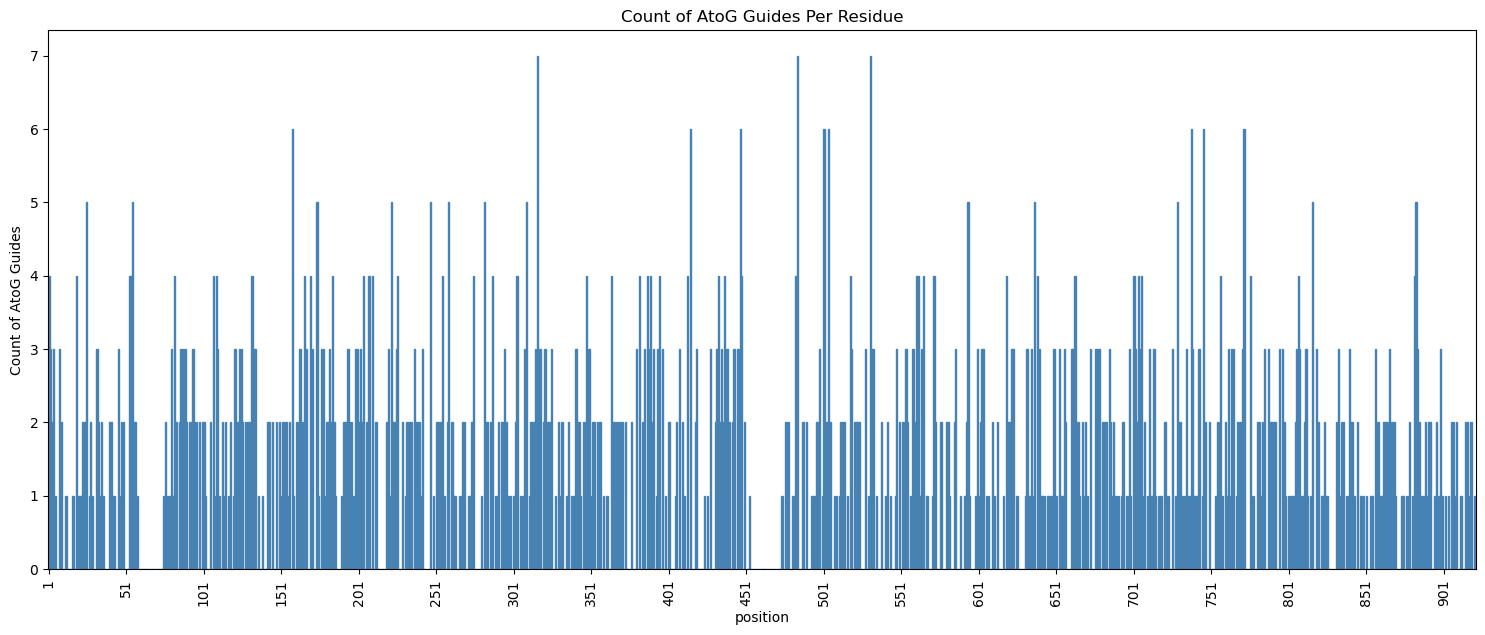

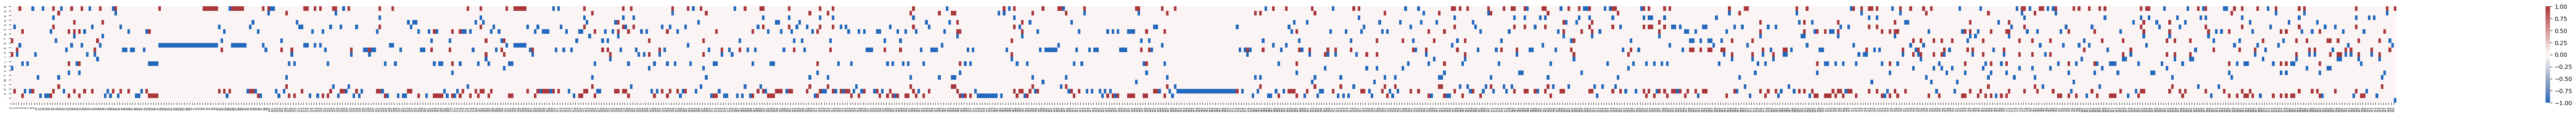

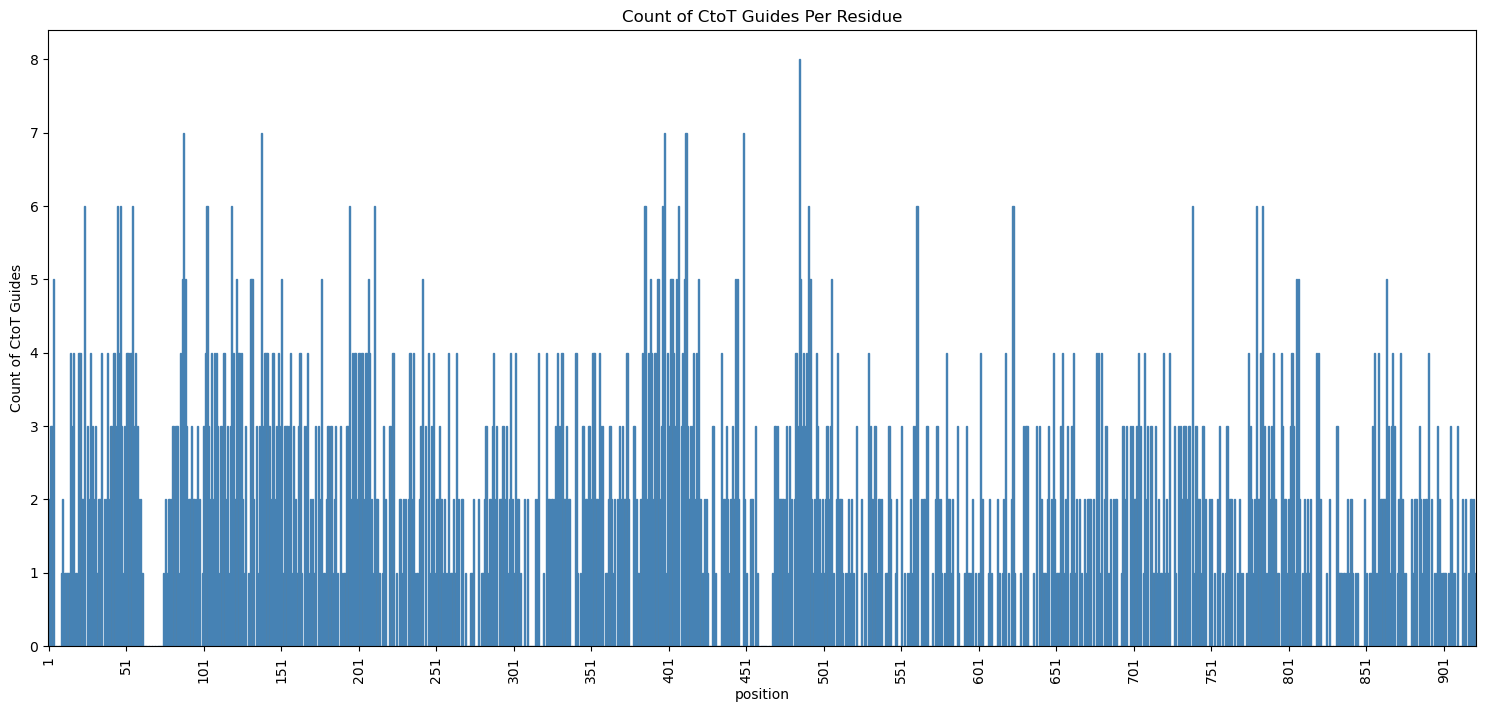

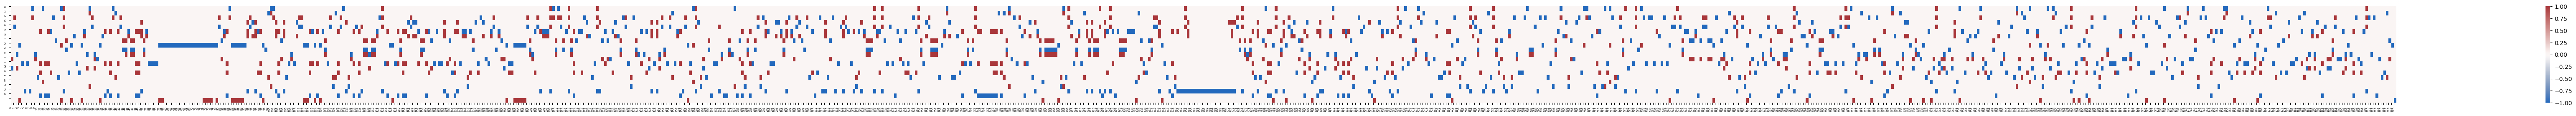

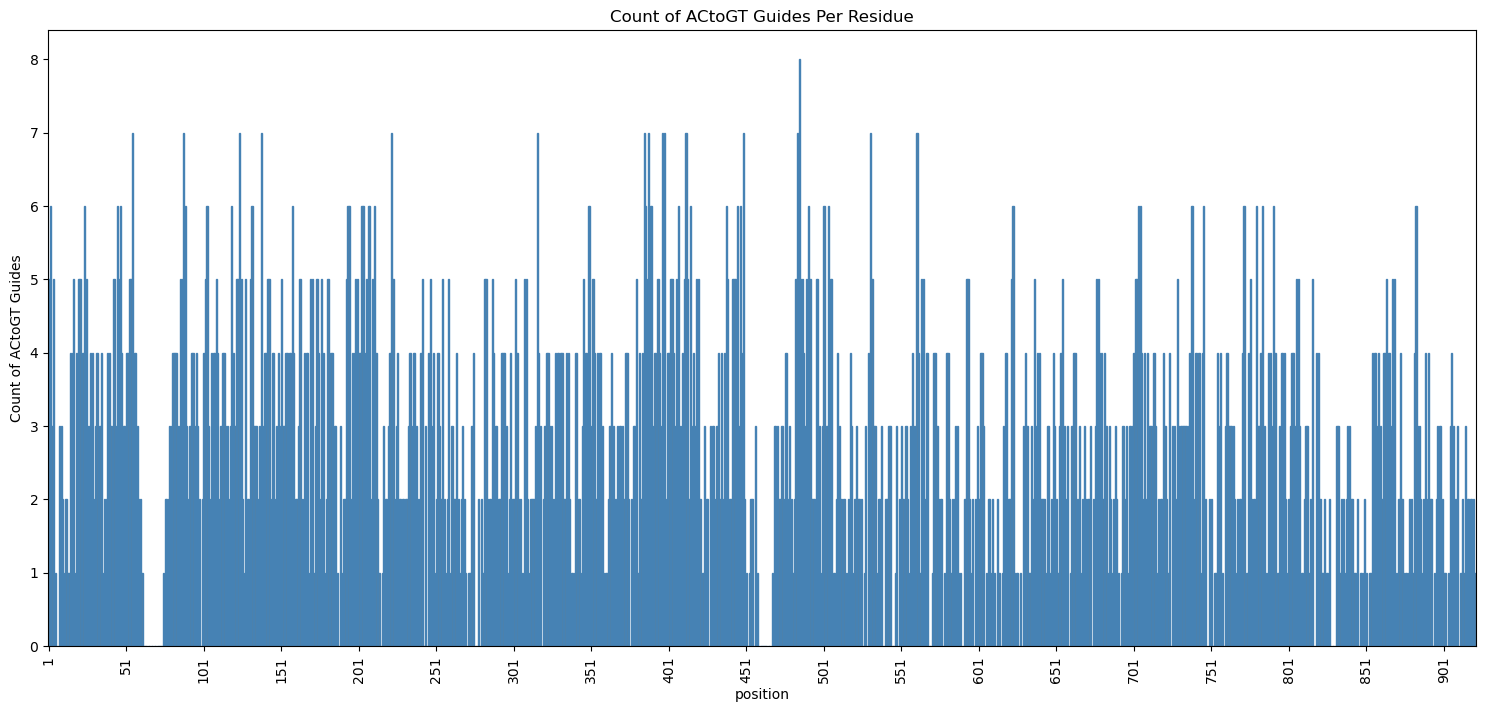

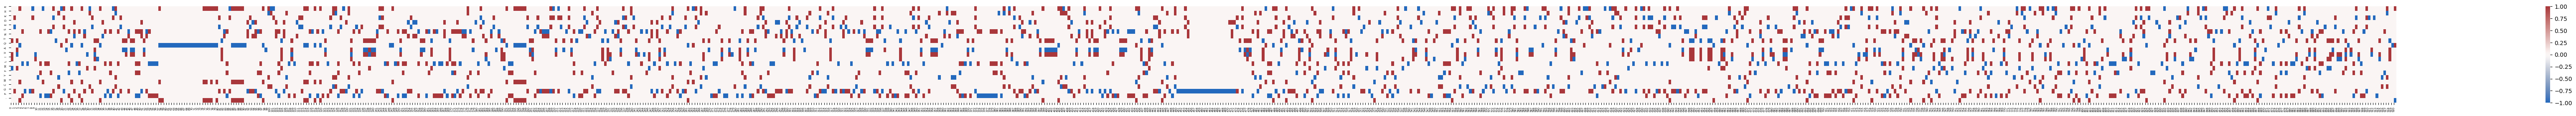

In [ ]:
# Including a protein sequence to double check annotations against a sequence
# and automatically generate a set of coverage and mutational space plots
guides = design_library(
    gene_filepath    = f"{sgrna_dir}230408_AR_Input.fasta", 
    cas_type         = "SpG", 
    edit_from_list   = ["A", "C", "AC"], 
    edit_to_list     = ["G", "T", "GT"],
    # optional inputs
    protein_filepath = f"{sgrna_dir}P10275.fasta", 
    )
print(guides.columns)
guides.head(5)

In [ ]:
# Excluding sgRNA sequences in introns and sgRNA sequences without a editable base in residue (nonediting)
guides = design_library(gene_filepath    = f"{sgrna_dir}230408_AR_Input.fasta", 
                        cas_type         = "SpG", 
                        edit_from_list   = ["A", "C", "AC"], 
                        edit_to_list     = ["G", "T", "GT"],
                        # optional inputs
                        exclude_introns  = True, exclude_nonediting = True,
                        )
print(guides.columns)
guides.head(5) # a much smaller library is generated

Create gene object from ../../../tests/test_data/sgrna/230408_AR_Input.fasta
Parsing exons: 8 exons found
Preprocessing sucessful!
Guides generated and duplicates removed
1040 guides were generated
Guides annotated for A to G.
Guides annotated for C to T.
Guides annotated for AC to GT.
Complete! Library generated from ../../../tests/test_data/sgrna/230408_AR_Input.fasta
Index(['sgRNA_ID', 'sgRNA_seq', 'PAM_seq', 'starting_frame', 'gene_pos',
       'chr_pos', 'exon', 'windowstart_pos', 'windowend_pos', 'coding_seq',
       'sgRNA_strand', 'gene_strand', 'gene', 'AtoG_win_overlap', 'A_count',
       'AtoG_mutations', 'AtoG_muttypes', 'AtoG_muttype', 'CtoT_win_overlap',
       'C_count', 'CtoT_mutations', 'CtoT_muttypes', 'CtoT_muttype',
       'ACtoGT_win_overlap', 'AC_count', 'ACtoGT_mutations', 'ACtoGT_muttypes',
       'ACtoGT_muttype'],
      dtype='object')


,sgRNA_ID,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,windowstart_pos,windowend_pos,coding_seq,...,CtoT_win_overlap,C_count,CtoT_mutations,CtoT_muttypes,CtoT_muttype,ACtoGT_win_overlap,AC_count,ACtoGT_mutations,ACtoGT_muttypes,ACtoGT_muttype
0,sgRNA_0,tcaaggATGGAAGTGCAGTT,AGG,0,-1,67545141,0,-1,1,tcaaggATGGAAGTGCAGTT,...,Exon/Intron,0,NaN,NaN,Splice-acceptor,Exon/Intron,1,M1V,Missense,Splice-acceptor
1,sgRNA_1,caaggATGGAAGTGCAGTTA,GGG,1,-1,67545142,0,-1,2,caaggATGGAAGTGCAGTTA,...,Exon/Intron,0,NaN,NaN,Splice-acceptor,Exon/Intron,1,M1V,Missense,Splice-acceptor
2,sgRNA_2,aaggATGGAAGTGCAGTTAG,GGC,2,-1,67545143,0,-1,3,aaggATGGAAGTGCAGTTAG,...,Exon/Intron,0,NaN,NaN,Splice-acceptor,Exon/Intron,1,M1V,Missense,Splice-acceptor
3,sgRNA_3,gATGGAAGTGCAGTTAGGGC,TGG,2,-1,67545146,0,2,6,gATGGAAGTGCAGTTAGGGC,...,Exon,0,NaN,NaN,No Mutation,Exon,2,E2E;E2G,Silent;Missense,Missense
4,sgRNA_4,ATGGAAGTGCAGTTAGGGCT,GGG,0,0,67545147,0,3,7,ATGGAAGTGCAGTTAGGGCT,...,Exon,0,NaN,NaN,No Mutation,Exon,2,E2E;E2G,Silent;Missense,Missense


Create gene object from ../../../tests/test_data/sgrna/230408_AR_Input.fasta
Parsing exons: 8 exons found
Preprocessing sucessful!
Guides generated and duplicates removed
1595 guides were generated
Guides annotated for A to G.
Guides annotated for C to T.
Guides annotated for AC to GT.
5962 lines processed from ../../../tests/test_data/sgrna/hg38_short.fa
Guides checked against reference genome
0 guides out of 1595 occurred more than once in the reference genome
Complete! Library generated from ../../../tests/test_data/sgrna/230408_AR_Input.fasta
Index(['sgRNA_ID', 'sgRNA_seq', 'PAM_seq', 'starting_frame', 'gene_pos',
       'chr_pos', 'exon', 'windowstart_pos', 'windowend_pos', 'coding_seq',
       'sgRNA_strand', 'gene_strand', 'gene', 'AtoG_win_overlap', 'A_count',
       'AtoG_mutations', 'AtoG_muttypes', 'AtoG_muttype', 'CtoT_win_overlap',
       'C_count', 'CtoT_mutations', 'CtoT_muttypes', 'CtoT_muttype',
       'ACtoGT_win_overlap', 'AC_count', 'ACtoGT_mutations', 'ACtoGT_mutty

,sgRNA_ID,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,windowstart_pos,windowend_pos,coding_seq,...,C_count,CtoT_mutations,CtoT_muttypes,CtoT_muttype,ACtoGT_win_overlap,AC_count,ACtoGT_mutations,ACtoGT_muttypes,ACtoGT_muttype,ref_occurrences
0,sgRNA_0,gattcagccaagctcaaggA,TGG,2,-1,67545128,0,-1,-1,gattcagccaagctcaaggA,...,0,NaN,NaN,Intron,Intron,0,NaN,NaN,Intron,0
1,sgRNA_1,attcagccaagctcaaggAT,GGA,0,-1,67545129,0,-1,-1,attcagccaagctcaaggAT,...,0,NaN,NaN,Intron,Intron,0,NaN,NaN,Intron,0
2,sgRNA_2,cagccaagctcaaggATGGA,AGT,0,-1,67545132,0,-1,-1,cagccaagctcaaggATGGA,...,0,NaN,NaN,Intron,Intron,0,NaN,NaN,Intron,0
3,sgRNA_3,gccaagctcaaggATGGAAG,TGC,2,-1,67545134,0,-1,-1,gccaagctcaaggATGGAAG,...,0,NaN,NaN,Intron,Intron,0,NaN,NaN,Intron,0
4,sgRNA_787,CTTCCATccttgagcttggc,tga,0,6,67545153,0,3,-1,gccaagctcaaggATGGAAG,...,2,M1I;M1I/E2K;E2K,Missense;Missense/Missense;Missense,Missense,Intron,3,M1T;E2K;M1I;M1T/E2K;M1I/E2K,Missense;Missense;Missense;Missense/Missense;M...,Missense,0


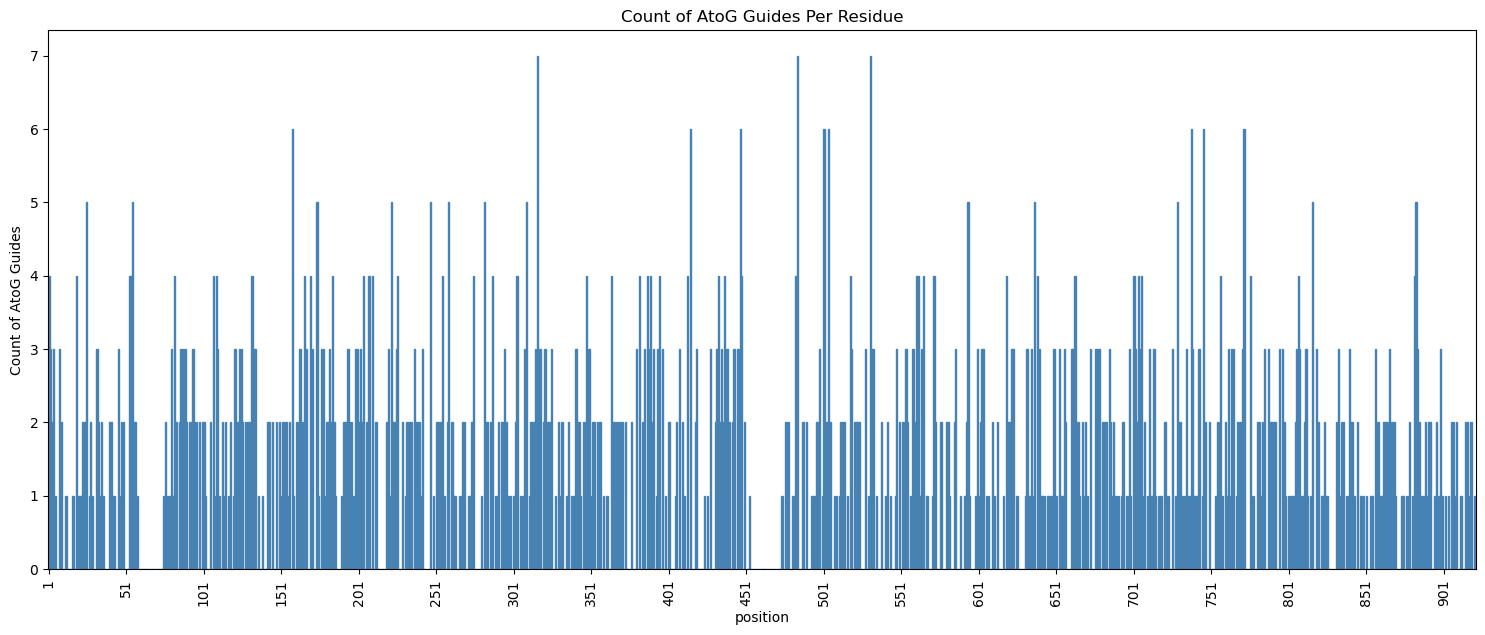

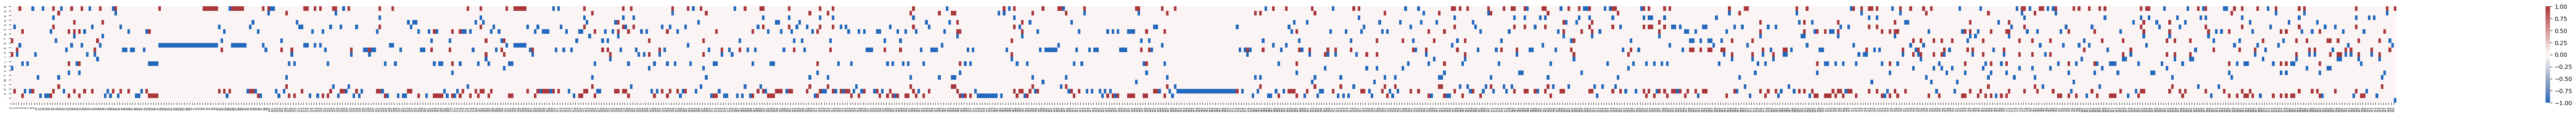

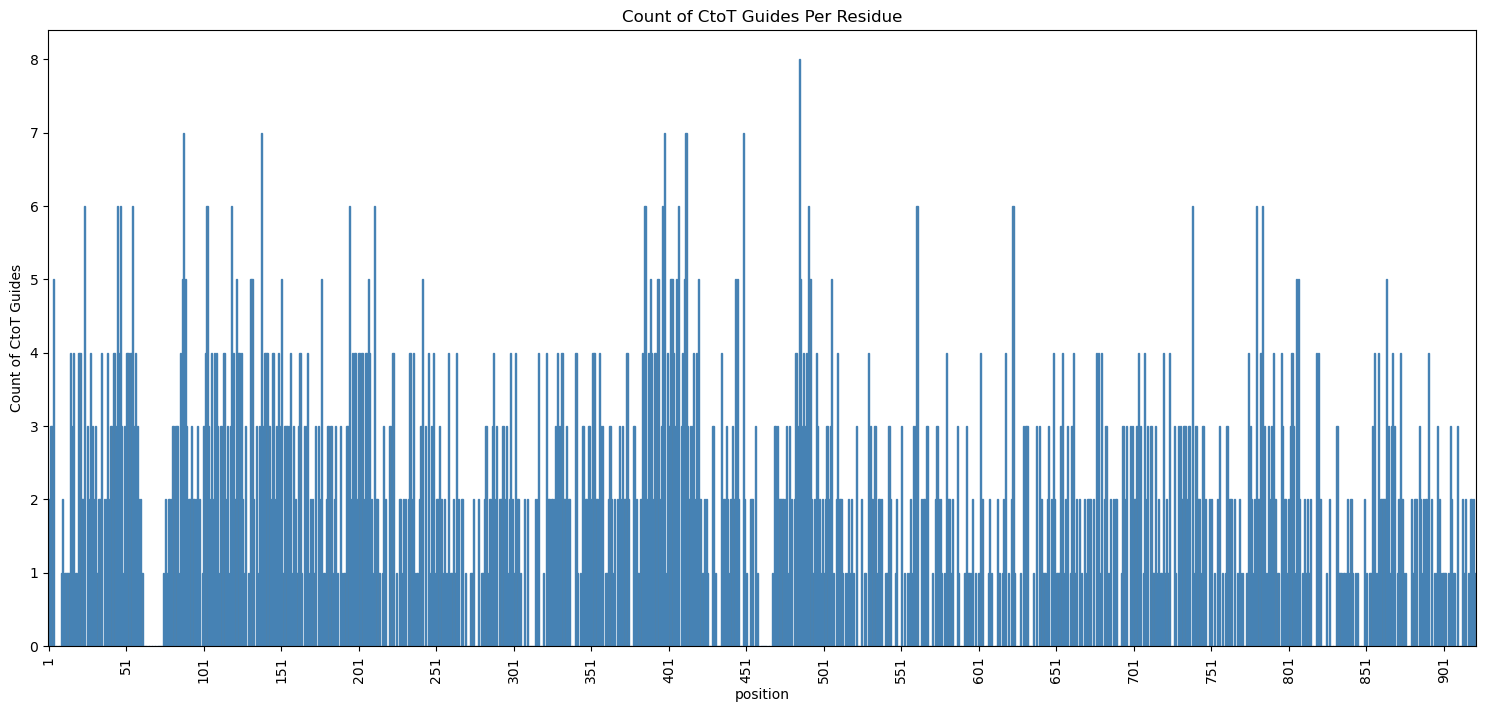

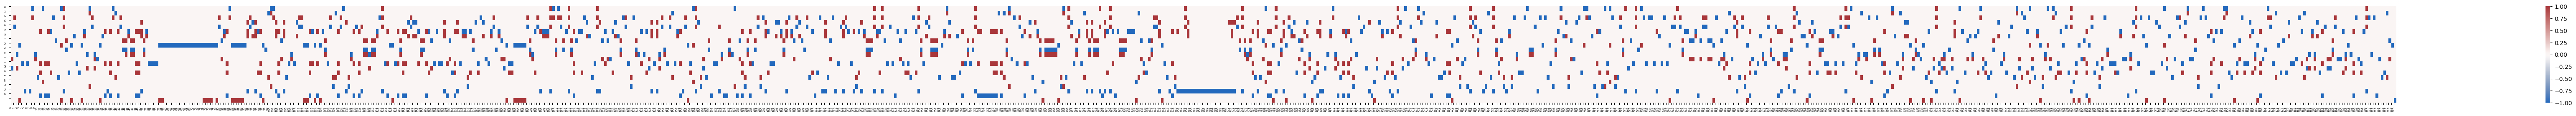

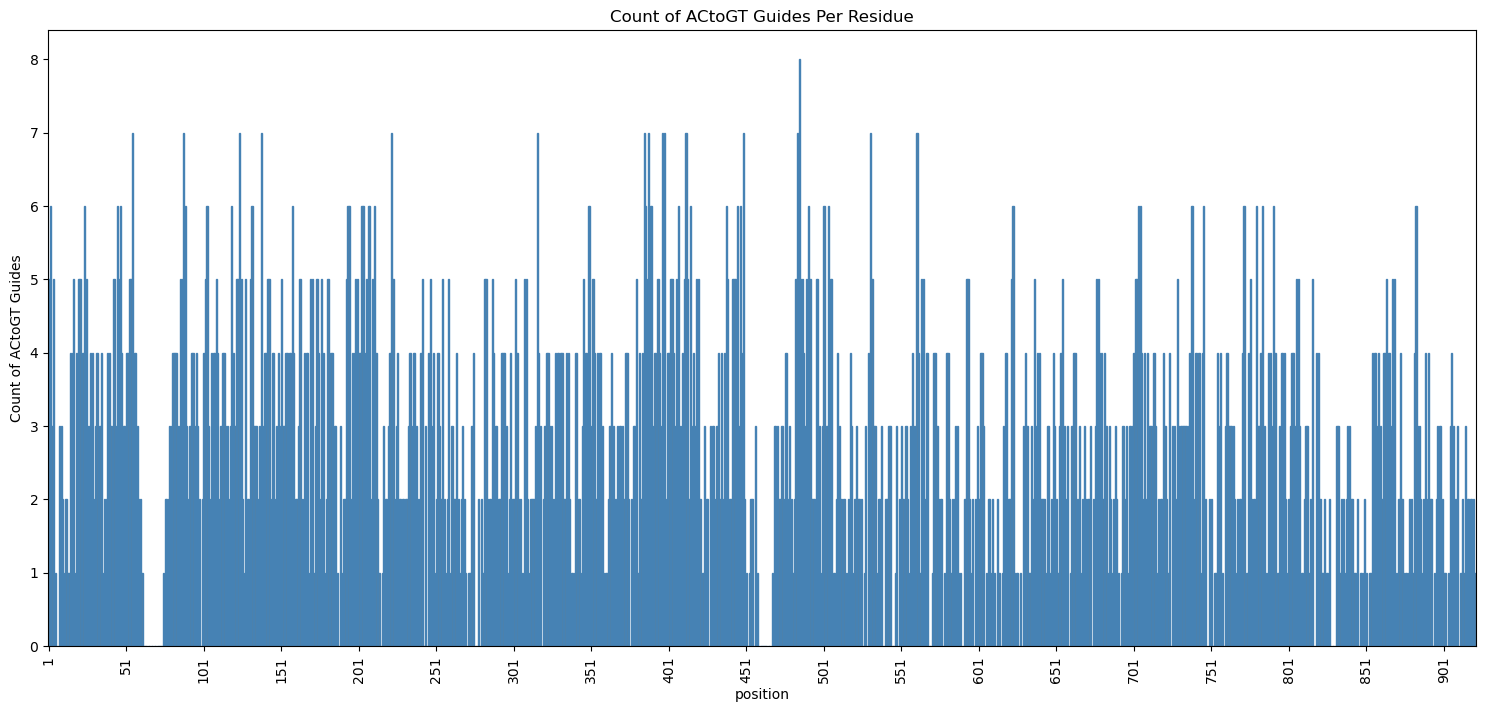

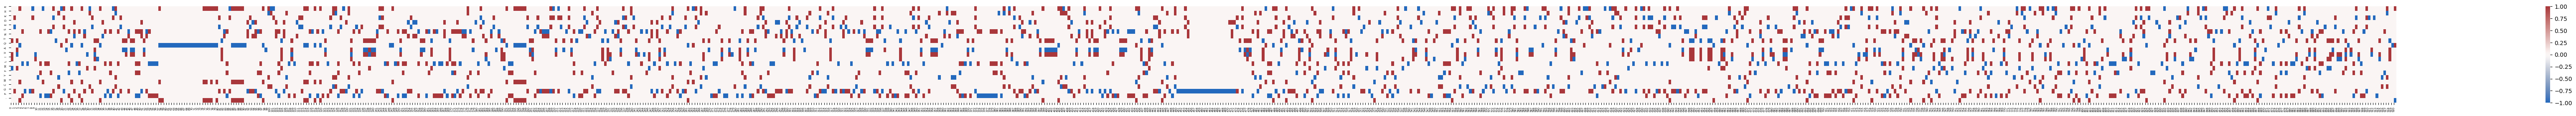

In [ ]:
# More complete version
guides = design_library(
    gene_filepath    = f"{sgrna_dir}230408_AR_Input.fasta", 
    cas_type         = "SpG", 
    edit_from_list   = ["A", "C", "AC"], 
    edit_to_list     = ["G", "T", "GT"],
    # optional inputs
    genome_file      = f"{sgrna_dir}hg38_short.fa", # truncated version of hg38 reference genome sequence
    delete           = True,
    protein_filepath = f"{sgrna_dir}P10275.fasta", 
    exclude_introns  = False, exclude_nonediting = False,
    )
print(guides.columns)
guides.head(5)

## be_scan.analysis.batch_process()

Sample sheet is set up like this: 

| sample_id | fastq_file       | condition  | agg_conditions | counts_file  | noncounts_file  | stats_file  |
| --------- | ----------       | ---------  | -------------- | -----------  | --------------  | ----------  |
| 0         | control.fastq.gz | t0         | t0             | counts-1.csv | noncounts-1.csv | stats-1.txt |
| 1         | cond_A1.fastq.gz | unsorted-1 | unsorted       | counts-2.csv | noncounts-2.csv | stats-2.txt |
| 2         | cond_A2.fastq.gz | unsorted-2 | unsorted       | counts-3.csv | noncounts-3.csv | stats-3.txt |
| 3         | cond_A3.fastq.gz | unsorted-3 | unsorted       | counts-4.csv | noncounts-4.csv | stats-4.txt |
| 4         | cond_B1.fastq.gz | sorted-1   | sorted         | counts-5.csv | noncounts-5.csv | stats-5.txt |
| 5         | cond_B2.fastq.gz | sorted-2   | sorted         | counts-6.csv | noncounts-6.csv | stats-6.txt |
| 6         | cond_B3.fastq.gz | sorted-3   | sorted         | counts-7.csv | noncounts-7.csv | stats-7.txt |

Comparisons sheet is set up like this: 

| name | treatment | control |
| ---- | --------- | ------- |
| sorted-unsorted | sorted | unsorted |

The names for treatment and control in the comparison sheet should correspond to the agg_conditions in the sample sheet

In [3]:
from be_scan.analysis import batch_process
analysis_dir = "../../../tests/test_data/analysis/"

In [ ]:
# Most basic example
batch_process(
    sample_sheet  = f"{analysis_dir}sample_sheet.csv", 
    annotated_lib = f"{analysis_dir}annotated_lib_sample_in.csv", 
    file_dir     = analysis_dir, 

    # optional, typically you can leave these out since these are the dummy sequences I used to not include any real data
    KEY_INTERVAL = (0,35), KEY = "ABCDEF", KEY_REV = "GHIJKL", controls = ["t0"], return_df = True, 
)

../../../tests/test_data/analysis/dummy1.fastq processed
../../../tests/test_data/analysis/dummy2.fastq processed
../../../tests/test_data/analysis/dummy3.fastq processed
../../../tests/test_data/analysis/dummy4.fastq processed
count_reads output to ../../../tests/test_data/analysis/counts_library.csv
Count reads completed
merge_and_norm output to ../../../tests/test_data/analysis/library_LFC.csv
Merge and normalize completed


,sgRNA_seq,gene,t0,counts2,counts3,counts4,control_avg,control_avg_LFC,control_avg_LFCminusControl,t0_LFC,counts2_LFC,counts2_LFCminusControl,counts3_LFC,counts3_LFCminusControl,counts4_LFC,counts4_LFCminusControl,cond1_LFCminusControl_avg,cond1_LFCminusControl_stdev
0,AAAAAAAAAAAAAAAAAAAA,gene,100,98,95,105,100.0,17.931574,0.0,17.931574,18.042458,0.110884,17.973953,0.042378,18.072172,0.140598,0.097953,0.050370
1,BBBBBBBBBBBBBBBBBBBB,gene,100,0,1,2,100.0,17.931574,0.0,17.931574,0.000000,-17.931574,11.404624,-6.526951,12.358196,-5.573378,-10.010634,6.876285
2,CCCCCCCCCCCCCCCCCCCC,gene,0,90,92,100,0.0,0.000000,0.0,0.000000,17.919602,17.919602,17.927659,17.927659,18.001783,18.001783,17.949681,0.045301
3,DDDDDDDDDDDDDDDDDDDD,gene,0,0,2,4,0.0,0.000000,0.0,0.000000,0.000000,0.000000,12.404358,12.404358,13.358059,13.358059,8.587472,7.452241
4,EEEEEEEEEEEEEEEEEEEE,control,100,90,92,84,100.0,17.931574,0.0,17.931574,17.919602,-0.011973,17.927659,-0.003915,17.750245,-0.181329,-0.065739,0.100185
5,FFFFFFFFFFFFFFFFFFFF,control,100,85,87,86,100.0,17.931574,0.0,17.931574,17.837140,-0.094434,17.847041,-0.084533,17.784193,-0.147382,-0.108783,0.033792


In [ ]:
# Including a comparison between 2 conditions
batch_process(
    sample_sheet  = f"{analysis_dir}sample_sheet.csv", 
    annotated_lib = f"{analysis_dir}annotated_lib_sample_in.csv", 
    file_dir     = analysis_dir, 
    comparisons   = f"{analysis_dir}comparisons.csv", 
    
    # optional, typically you can leave these out since these are the dummy sequences I used to not include any real data
    KEY_INTERVAL = (0,35), KEY = "ABCDEF", KEY_REV = "GHIJKL", controls = ["t0"], return_df = True, 
)

../../../tests/test_data/analysis/dummy1.fastq processed
../../../tests/test_data/analysis/dummy2.fastq processed
../../../tests/test_data/analysis/dummy3.fastq processed
../../../tests/test_data/analysis/dummy4.fastq processed
count_reads output to ../../../tests/test_data/analysis/counts_library.csv
Count reads completed
merge_and_norm output to ../../../tests/test_data/analysis/library_LFC.csv
Merge and normalize completed
compare_conds outputed to ../../../tests/test_data/analysis/conditions.csv
Compare conditions completed


,sgRNA_seq,gene,t0,counts2,counts3,counts4,control_avg,control_avg_LFC,control_avg_LFCminusControl,t0_LFC,counts2_LFC,counts2_LFCminusControl,counts3_LFC,counts3_LFCminusControl,counts4_LFC,counts4_LFCminusControl,cond1_LFCminusControl_avg,cond1_LFCminusControl_stdev,cond1-cond1
0,AAAAAAAAAAAAAAAAAAAA,gene,100,98,95,105,100.0,17.931574,0.0,17.931574,18.042458,0.110884,17.973953,0.042378,18.072172,0.140598,0.097953,0.050370,0.0
1,BBBBBBBBBBBBBBBBBBBB,gene,100,0,1,2,100.0,17.931574,0.0,17.931574,0.000000,-17.931574,11.404624,-6.526951,12.358196,-5.573378,-10.010634,6.876285,0.0
2,CCCCCCCCCCCCCCCCCCCC,gene,0,90,92,100,0.0,0.000000,0.0,0.000000,17.919602,17.919602,17.927659,17.927659,18.001783,18.001783,17.949681,0.045301,0.0
3,DDDDDDDDDDDDDDDDDDDD,gene,0,0,2,4,0.0,0.000000,0.0,0.000000,0.000000,0.000000,12.404358,12.404358,13.358059,13.358059,8.587472,7.452241,0.0
4,EEEEEEEEEEEEEEEEEEEE,control,100,90,92,84,100.0,17.931574,0.0,17.931574,17.919602,-0.011973,17.927659,-0.003915,17.750245,-0.181329,-0.065739,0.100185,0.0
5,FFFFFFFFFFFFFFFFFFFF,control,100,85,87,86,100.0,17.931574,0.0,17.931574,17.837140,-0.094434,17.847041,-0.084533,17.784193,-0.147382,-0.108783,0.033792,0.0


In [11]:
# Including a statistical analysis of a condition
batch_process(
    sample_sheet  = f"{analysis_dir}sample_sheet.csv", 
    annotated_lib = f"{analysis_dir}annotated_lib_sample_in.csv", 
    comparisons   = f"{analysis_dir}comparisons.csv", 
    file_dir     = analysis_dir, 

    # optional, typically you can leave these out since these are the dummy sequences I used to not include any real data
    KEY_INTERVAL = (0,35), KEY = "ABCDEF", KEY_REV = "GHIJKL", controls = ["t0"], return_df = True, 
    neg_ctrl_col = 'gene', neg_ctrl_conditions = ['control'], stats_comparisons = ['cond1'], 
)

../../../tests/test_data/analysis/dummy1.fastq processed
../../../tests/test_data/analysis/dummy2.fastq processed
../../../tests/test_data/analysis/dummy3.fastq processed
../../../tests/test_data/analysis/dummy4.fastq processed
count_reads output to ../../../tests/test_data/analysis/counts_library.csv
Count reads completed
merge_and_norm output to ../../../tests/test_data/analysis/library_LFC.csv
Merge and normalize completed
compare_conds outputed to ../../../tests/test_data/analysis/conditions.csv
Compare conditions completed
calc_controls outputed to ../../../tests/test_data/analysis/stats.txt
For comparison cond1_LFCminusControl_avg

Mean is -0.08726100088385516

Standard deviation is 0.03043688479378085

Mean +- 2 standard deviations -0.02638723129629346 -0.14813477047141688

Calculating controls completed


,sgRNA_seq,gene,t0,counts2,counts3,counts4,control_avg,control_avg_LFC,control_avg_LFCminusControl,t0_LFC,counts2_LFC,counts2_LFCminusControl,counts3_LFC,counts3_LFCminusControl,counts4_LFC,counts4_LFCminusControl,cond1_LFCminusControl_avg,cond1_LFCminusControl_stdev,cond1-cond1
0,AAAAAAAAAAAAAAAAAAAA,gene,100,98,95,105,100.0,17.931574,0.0,17.931574,18.042458,0.110884,17.973953,0.042378,18.072172,0.140598,0.097953,0.050370,0.0
1,BBBBBBBBBBBBBBBBBBBB,gene,100,0,1,2,100.0,17.931574,0.0,17.931574,0.000000,-17.931574,11.404624,-6.526951,12.358196,-5.573378,-10.010634,6.876285,0.0
2,CCCCCCCCCCCCCCCCCCCC,gene,0,90,92,100,0.0,0.000000,0.0,0.000000,17.919602,17.919602,17.927659,17.927659,18.001783,18.001783,17.949681,0.045301,0.0
3,DDDDDDDDDDDDDDDDDDDD,gene,0,0,2,4,0.0,0.000000,0.0,0.000000,0.000000,0.000000,12.404358,12.404358,13.358059,13.358059,8.587472,7.452241,0.0
4,EEEEEEEEEEEEEEEEEEEE,control,100,90,92,84,100.0,17.931574,0.0,17.931574,17.919602,-0.011973,17.927659,-0.003915,17.750245,-0.181329,-0.065739,0.100185,0.0
5,FFFFFFFFFFFFFFFFFFFF,control,100,85,87,86,100.0,17.931574,0.0,17.931574,17.837140,-0.094434,17.847041,-0.084533,17.784193,-0.147382,-0.108783,0.033792,0.0


## be_scan.plot.scatterplot()

In [ ]:
import be_scan
plot_file = '../../../tests/test_data/plot/NZL10196_v9_comparisons.csv'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


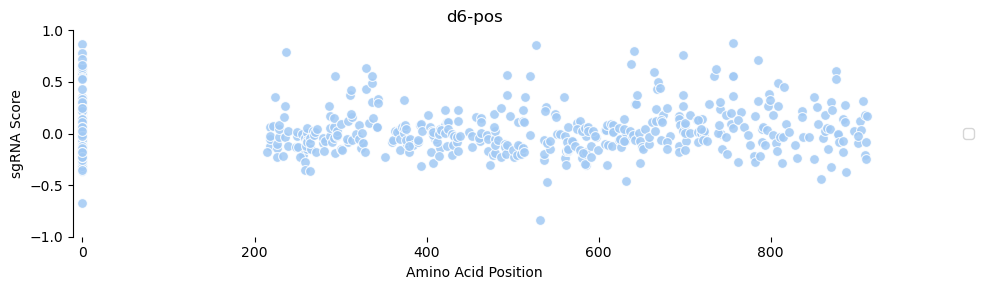

In [16]:
# Most basic version
be_scan.plot.scatterplot(
    df_filepath  = plot_file, # data
    x_column     = 'Edit_site_3A1', # name of a column in data
    comparisons  = ['d6-pos'], # names of a column in data, each is a graph
    )

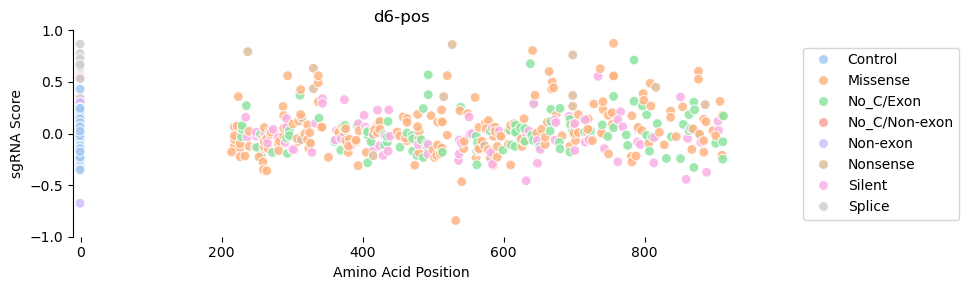

In [15]:
# Coloring by mutation type
be_scan.plot.scatterplot(
    df_filepath  = plot_file, # data
    x_column     = 'Edit_site_3A1', # name of a column in data
    comparisons  = ['d6-pos'], # names of a column in data, each is a graph

    # optional
    include_hue=True, hue_col='Mut_type', 
    )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


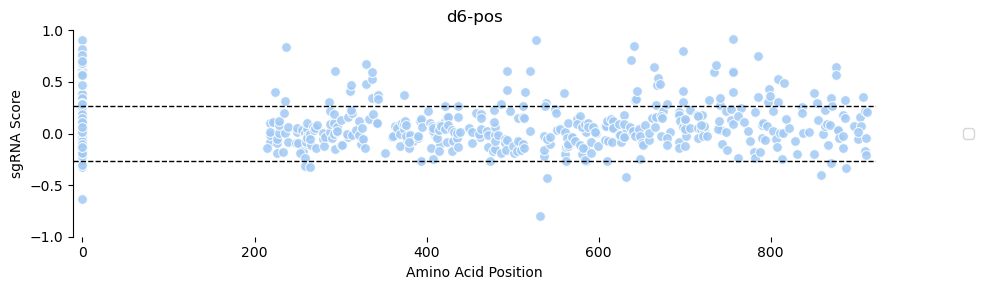

In [30]:
# Normalizing to be centered around 0
be_scan.plot.scatterplot(
    df_filepath  = plot_file, # data
    x_column     = 'Edit_site_3A1', # name of a column in data
    comparisons  = ['d6-pos'], # names of a column in data, each is a graph

    # optional
    neg_ctrl=True, neg_ctrl_col='Gene', neg_ctrl_conditions=['NON-GENE'], # negative control lines
    )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


        sgRNA_ID             sgRNA_seq    Gene  sgRNA_pos sgRNA_strand  \
530  DNMT3A2_532  TCTCAAAGAGCCAGAAGAAG  DNMT3A   25240355    antisense   
300  DNMT3A2_302  TGTCTGGAAAGCAGAGGGAG  DNMT3A   25245330    antisense   
337  DNMT3A2_339  GCGTACCAGTACGACGACGA  DNMT3A   25244634        sense   
426  DNMT3A2_428  CATCAAAGAGAGACAGCACC  DNMT3A   25243910    antisense   
65   DNMT3A2_066  GGAGTCTCAGAAGGTGGAGG  DNMT3A   25248190        sense   
301  DNMT3A2_303  ATGTCTGGAAAGCAGAGGGA  DNMT3A   25245329    antisense   
484  DNMT3A2_486  GCCCCACTCCTGGATCTGGG  DNMT3A   25240716    antisense   
333  DNMT3A2_335  AGTTCTAGACAGCAGCGGGA  DNMT3A   25244649    antisense   
555  DNMT3A2_557  AGAAGTGTCAGCTGCACACA  DNMT3A   25239189        sense   
424  DNMT3A2_426  AAGAGAGACAGCACCCGGAT  DNMT3A   25243915    antisense   

    Gene_strand           Edit_window  Targeted_exon  Win_overlap  C_count  \
530       minus  (25240358, 25240362)             14         Exon        1   
300       minus  (25245333, 2

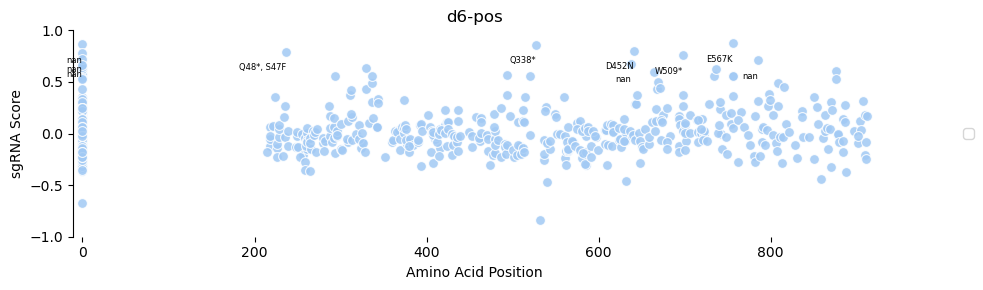

In [23]:
# Annotating top 10 guides
be_scan.plot.scatterplot(
    df_filepath  = plot_file, # data
    x_column     = 'Edit_site_3A1', # name of a column in data
    comparisons  = ['d6-pos'], # names of a column in data, each is a graph

    # optional
    annot=True, annot_top=10, annot_label='Mut_list_all', # automatically label points
    )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


        sgRNA_ID             sgRNA_seq       Gene  sgRNA_pos sgRNA_strand  \
338  DNMT3A2_340  GGTAGCCGTCGTCGTCGTAC     DNMT3A   25244607    antisense   
412  DNMT3A2_414  TCCTAAGCAGTGAGCACAAC     DNMT3A   25243981    antisense   
341  DNMT3A2_343  CCCACAGCAGATGGTGCAGT     DNMT3A   25244581    antisense   
420  DNMT3A2_422  TGGGCTTCCTCTTCTCAGCT     DNMT3A   25243934    antisense   
615  DNMT3A2_617  CATCTTATGGTGCACTGAAA     DNMT3A   25235733        sense   
643  DNMT3A2_645  AGAGACTGCTGGGCCGGTCA     DNMT3A   25234361        sense   
85   DNMT3A2_086  GAGCCCGTGGGGTCCGATGC     DNMT3A   25248105        sense   
43   DNMT3A2_044  TGTGCAATGGGAGAATAACT     DNMT3A   25249640        sense   
75   DNMT3A2_076  GGTAGCCACAGTGGGGGATG     DNMT3A   25248112    antisense   
668  DNMT3A2_670  ACTACCTTATGATAGAGTTC  ESSENTIAL         -1          NaN   

    Gene_strand           Edit_window  Targeted_exon Win_overlap  C_count  \
338       minus  (25244610, 25244614)              9        Exon        2  

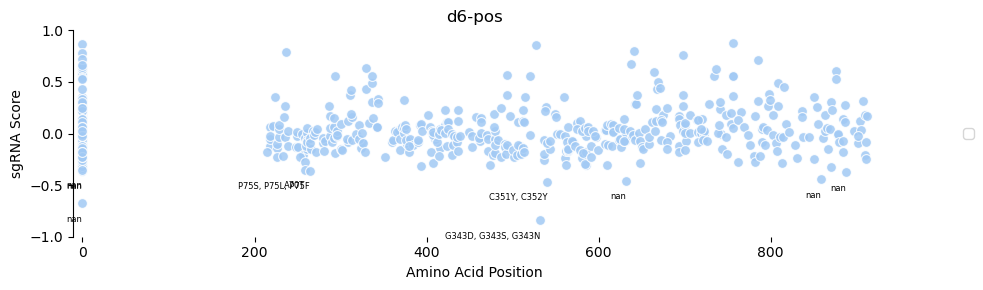

In [24]:
# Annotating bottom 10 guides
be_scan.plot.scatterplot(
    df_filepath  = plot_file, # data
    x_column     = 'Edit_site_3A1', # name of a column in data
    comparisons  = ['d6-pos'], # names of a column in data, each is a graph

    # optional
    annot=True, annot_top=-10, annot_label='Mut_list_all', # automatically label points
    )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


        sgRNA_ID             sgRNA_seq    Gene  sgRNA_pos sgRNA_strand  \
530  DNMT3A2_532  TCTCAAAGAGCCAGAAGAAG  DNMT3A   25240355    antisense   
300  DNMT3A2_302  TGTCTGGAAAGCAGAGGGAG  DNMT3A   25245330    antisense   
337  DNMT3A2_339  GCGTACCAGTACGACGACGA  DNMT3A   25244634        sense   
338  DNMT3A2_340  GGTAGCCGTCGTCGTCGTAC  DNMT3A   25244607    antisense   
426  DNMT3A2_428  CATCAAAGAGAGACAGCACC  DNMT3A   25243910    antisense   
65   DNMT3A2_066  GGAGTCTCAGAAGGTGGAGG  DNMT3A   25248190        sense   
301  DNMT3A2_303  ATGTCTGGAAAGCAGAGGGA  DNMT3A   25245329    antisense   
484  DNMT3A2_486  GCCCCACTCCTGGATCTGGG  DNMT3A   25240716    antisense   
333  DNMT3A2_335  AGTTCTAGACAGCAGCGGGA  DNMT3A   25244649    antisense   
555  DNMT3A2_557  AGAAGTGTCAGCTGCACACA  DNMT3A   25239189        sense   

    Gene_strand           Edit_window  Targeted_exon  Win_overlap  C_count  \
530       minus  (25240358, 25240362)             14         Exon        1   
300       minus  (25245333, 2

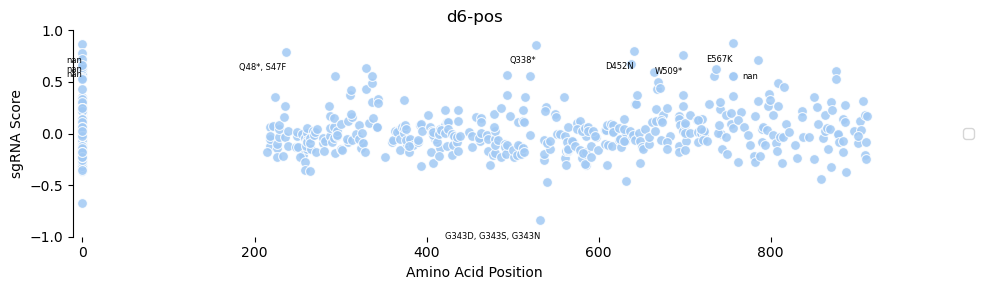

In [25]:
# Annotating top or bottom 10 guides
be_scan.plot.scatterplot(
    df_filepath  = plot_file, # data
    x_column     = 'Edit_site_3A1', # name of a column in data
    comparisons  = ['d6-pos'], # names of a column in data, each is a graph

    # optional
    annot=True, annot_abs=10, annot_label='Mut_list_all', # automatically label points
    )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


        sgRNA_ID             sgRNA_seq    Gene  sgRNA_pos sgRNA_strand  \
530  DNMT3A2_532  TCTCAAAGAGCCAGAAGAAG  DNMT3A   25240355    antisense   
300  DNMT3A2_302  TGTCTGGAAAGCAGAGGGAG  DNMT3A   25245330    antisense   
337  DNMT3A2_339  GCGTACCAGTACGACGACGA  DNMT3A   25244634        sense   
426  DNMT3A2_428  CATCAAAGAGAGACAGCACC  DNMT3A   25243910    antisense   
338  DNMT3A2_340  GGTAGCCGTCGTCGTCGTAC  DNMT3A   25244607    antisense   

    Gene_strand           Edit_window  Targeted_exon Win_overlap  C_count  \
530       minus  (25240358, 25240362)             14        Exon        1   
300       minus  (25245333, 25245337)              8      Intron        1   
337       minus  (25244627, 25244631)              9        Exon        2   
426       minus  (25243913, 25243917)             11        Exon        1   
338       minus  (25244610, 25244614)              9        Exon        2   

     ... Mut_list_3A2 Mut_list_3A1 Edit_site_3A2 Edit_site_3A1    d3-pos  \
530  ...        

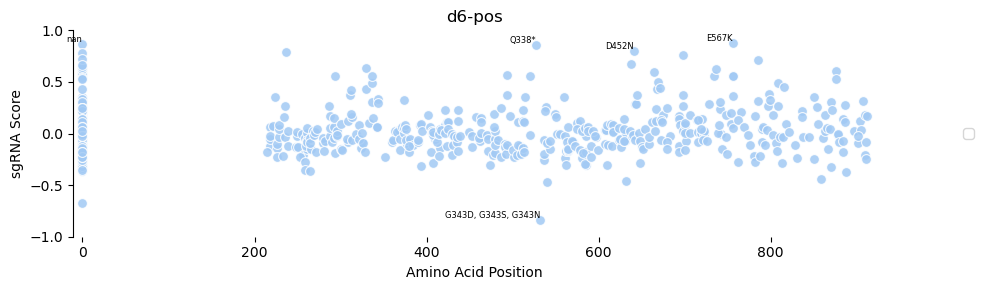

In [26]:
# Annotating top 10 guides
be_scan.plot.scatterplot(
    df_filepath  = plot_file, # data
    x_column     = 'Edit_site_3A1', # name of a column in data
    comparisons  = ['d6-pos'], # names of a column in data, each is a graph

    # optional
    annot=True, annot_cutoff=0.8, annot_label='Mut_list_all', # automatically label points
    )

        sgRNA_ID             sgRNA_seq    Gene  sgRNA_pos sgRNA_strand  \
530  DNMT3A2_532  TCTCAAAGAGCCAGAAGAAG  DNMT3A   25240355    antisense   
300  DNMT3A2_302  TGTCTGGAAAGCAGAGGGAG  DNMT3A   25245330    antisense   
337  DNMT3A2_339  GCGTACCAGTACGACGACGA  DNMT3A   25244634        sense   
426  DNMT3A2_428  CATCAAAGAGAGACAGCACC  DNMT3A   25243910    antisense   
65   DNMT3A2_066  GGAGTCTCAGAAGGTGGAGG  DNMT3A   25248190        sense   
301  DNMT3A2_303  ATGTCTGGAAAGCAGAGGGA  DNMT3A   25245329    antisense   
484  DNMT3A2_486  GCCCCACTCCTGGATCTGGG  DNMT3A   25240716    antisense   
338  DNMT3A2_340  GGTAGCCGTCGTCGTCGTAC  DNMT3A   25244607    antisense   

    Gene_strand           Edit_window  Targeted_exon  Win_overlap  C_count  \
530       minus  (25240358, 25240362)             14         Exon        1   
300       minus  (25245333, 25245337)              8       Intron        1   
337       minus  (25244627, 25244631)              9         Exon        2   
426       minus  (252

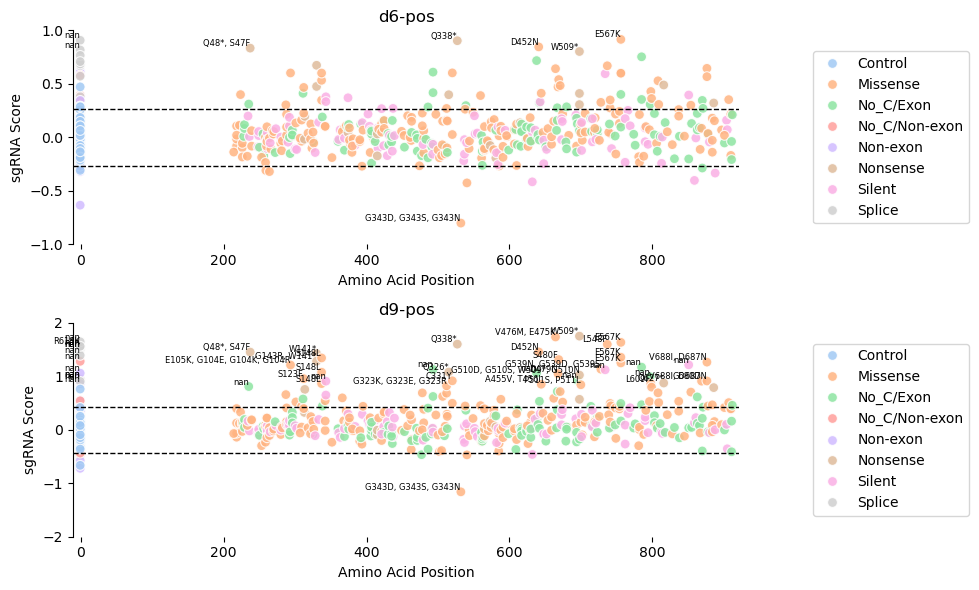

In [29]:
# More thorough version
be_scan.plot.scatterplot(
    df_filepath  = plot_file, # data
    x_column     = 'Edit_site_3A1',  # name of a column in data
    comparisons  = ['d6-pos', 'd9-pos'],       # names of a column in data, each is a graph

    # optional
    include_hue=True, hue_col='Mut_type', # color settings
    neg_ctrl=True, neg_ctrl_col='Gene', neg_ctrl_conditions=['NON-GENE'], # negative control lines
    annot=True, annot_cutoff=0.8, annot_label='Mut_list_all', # automatically label points
    )